<a href="https://colab.research.google.com/github/AnisAfiqah13/STQD6014-DATA-SCIENCE/blob/main/P132838_Anis_Project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TENNIS' GRAND SLAMS**

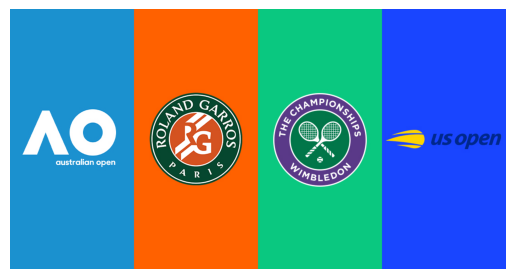

In [10]:
# @title
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread('/content/4-grand-slams.jpg')
plt.imshow(img)
plt.axis('off')
plt.show()

#**Introduction**

Welcome to our exploration of Tennis' Grand Slams, the most prestigious tournaments in the sport of tennis. This analysis dives into the history, significance, and key statistics that highlight the Grand Slam tournaments: the Australian Open, the French Open, Wimbledon, and the US Open. From historic wins to groundbreaking performances, our study aims to uncover patterns and insights that define greatness in the world of tennis. Whether you're a seasoned fan or new to the sport, this journey through the Grand Slams promises to enlighten and entertain.

The Grand Slam tournaments, also called majors, are the four most important annual tennis events. They offer the most ranking points, prize money, public and media attention, the greatest strength and size of field, and greater number of "best of" sets for men, which is 5.

The Grand Slam itinerary consists of the Australian Open in mid January, the French Open (also known as Roland Garros) from around late May to early June, Wimbledon in June–July, and the US Open in August–September. Each tournament is played over a two-week period. The Australian and United States tournaments are played on hard courts, the French on clay, and Wimbledon on grass. Wimbledon is the oldest, founded in 1877, followed by the US in 1881, the French in 1891, and the Australian in 1905.



**Data background:** The data for men's tennis singles only from year 1950 to 2023.

**Source:** Kaggle.com

# **Objectives**


1. Examine the performance of players over the years at each Grand Slam to identify patterns, such as dominance by certain players or countries, changes in competitive balance, or the impact of playing surfaces on player success.

2. Analyze key statistics from the tournaments, including match outcomes, player rankings, serve statistics, and more, to uncover trends that might indicate what it takes to win a Grand Slam and how the game has evolved over time.

3. Compare and contrast the four Grand Slams in terms of playing surface, prize money, player success, and other relevant metrics. This could include looking at which tournaments are most likely to produce upsets, the nationality of winners, or the impact of surface on the style of play.

4. Assess how performances at Grand Slam tournaments affect player rankings and careers, including the significance of winning a Grand Slam for a player's legacy and marketability.

# **Results**
Showcase your visualizations, insights, and explanations.

In [11]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

In [13]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
#Load the data chosen
tennis = pd.read_csv('/content/Mens_Tennis_Grand_Slam_Winner.csv')
tennis.head(5)

,YEAR,TOURNAMENT,WINNER,RUNNER-UP,WINNER_NATIONALITY,WINNER_ATP_RANKING,RUNNER-UP_ATP_RANKING,WINNER_LEFT_OR_RIGHT_HANDED,TOURNAMENT_SURFACE,WINNER_PRIZE
0,2023,Australian Open,Novak Djokovic,Stefanos Tsitsipas,Serbian,1.0,3.0,right,Plexicushion Prestige,2050000.0
1,2022,U.S. Open,Carlos Alcaraz,Casper Rudd,Spanish,2.0,5.0,right,DecoTurf - outdoors,2600000.0
2,2022,Wimbledon,Novak Djokovic,Nick Kyrgios,Serbian,NaN,25.0,right,Grass / Outdoor,2507460.0
3,2022,French Open,Rafael Nadal,Casper Rudd,Spanish,5.0,8.0,left,Clay,1870000.0
4,2022,Australian Open,Rafael Nadal,Daniil Medvedev,Spanish,5.0,2.0,left,Plexicushion Prestige,4400000.0


First, we load the data from csv format and look into the top 5 header of the data.

In 2023 Australian Open: Novak Djokovic from Serbia won, defeating Stefanos Tsitsipas. Djokovic was ranked number 1 at the time, and Tsitsipas was ranked number 3. The surface was Plexicushion Prestige, and the winner's prize was 2,050,000.

In 2022 U.S. Open: Carlos Alcaraz of Spain was the winner, with Casper Rudd as the runner-up. Alcaraz held the 2nd ATP ranking, and Rudd was 5th. The tournament was played on an outdoor DecoTurf surface, and the prize for the winner was 2,600,000.

In 2022 Wimbledon: Novak Djokovic again emerges as the winner, this time against Nick Kyrgios. Djokovic's ranking data is not available (NaN), while Kyrgios was 25th in the ATP rankings. Played on Grass/Outdoor, the winner's prize was 2,507,460.

2022 French Open: Rafael Nadal from Spain won against Casper Rudd. Nadal was 5th in ATP ranking and Rudd 8th, indicating a closely matched competition. The surface was Clay, a surface on which Nadal has historically excelled, with a prize of 1,870,000 awarded to the winner.


In [28]:
# Check for missing values
missing_values = tennis.isnull().sum()

# Calculate the percentage of missing values
percentage_missing = (missing_values / len(tennis)) * 100

# Prepare a summary of missing data
missing_data_summary = pd.DataFrame({
    'missing_values': missing_values,
    'percentage_missing': percentage_missing
})

missing_data_summary


,missing_values,percentage_missing
YEAR,0,0.000000
TOURNAMENT,0,0.000000
WINNER,0,0.000000
RUNNER-UP,0,0.000000
WINNER_NATIONALITY,0,0.000000
WINNER_ATP_RANKING,229,78.424658
RUNNER-UP_ATP_RANKING,228,78.082192
WINNER_LEFT_OR_RIGHT_HANDED,0,0.000000
TOURNAMENT_SURFACE,0,0.000000
WINNER_PRIZE,75,25.684932


In [33]:
tennis["WINNER_PRIZE"].fillna(tennis["WINNER_PRIZE"].median(),inplace=True)
tennis.isnull().sum()

YEAR                             0
TOURNAMENT                       0
WINNER                           0
RUNNER-UP                        0
WINNER_NATIONALITY               0
WINNER_ATP_RANKING             229
RUNNER-UP_ATP_RANKING          228
WINNER_LEFT_OR_RIGHT_HANDED      0
TOURNAMENT_SURFACE               0
WINNER_PRIZE                     0
dtype: int64

We have replaced the missing values for WINNER_PRIZE with the median values. For the other 2 variables - WINNER_ATP_RANKING & RUNNER-UP_ATP_RANKING, we will drop these 2 from further analysis as the missing values are 78%, it might be inappropriate to fill these gaps with any form of imputation, as it could significantly skew the data.

In [34]:
nationality = tennis['WINNER_NATIONALITY'].value_counts()[:8]

fig4 = px.pie(
    values=nationality.values,
    names=nationality.index,
    color_discrete_sequence=px.colors.qualitative.T10,
    title="Winner's Nationality",
)

fig4.update_traces(
    textinfo='label + percent',  # Set textinfo to display only label &  the percentage
    textfont_size=20,
    marker=dict(line=dict(color='black', width=1)),
)

fig4.data[0].marker.line.width = 1
fig4.data[0].marker.line.color = 'white'

fig4.update_layout(
    font=dict(family="Roboto", size=18),
    title=dict(text="Winner's Nationality", x=0.45)) # x=0.45 place the title position

fig4.show()


In [21]:
# Count the occurrences of each category
hand_counts = tennis['WINNER_LEFT_OR_RIGHT_HANDED'].value_counts().reset_index()
hand_counts.columns = ['Winner Hand', 'Count']

# Custom color mapping
color_mapping = {'left': 'blue', 'right': '#7fffd4'}

# Create a bar plot with custom colors
fig6 = px.bar(hand_counts, x='Winner Hand', y='Count', color='Winner Hand',
             color_discrete_map=color_mapping,
             title='Distribution of Winners by Hand',
             labels={'Count': 'Count', 'Winner Hand': 'Winner\'s Hand'},
             template='ggplot2')

# Update font family
fig6.update_layout(font=dict(family='Roboto',size=20, color = 'darkblue'))

# Show the plot
fig6.show()



In [ ]:
# total wins by players (3rd)
# tournaments surfaces and categorized it by hard court (4th)
# the frequency of winners and runners-up to identify the most successful players in Grand Slam tournaments.(5th)

In [14]:
WINNER_RUNNER_merged = pd.merge(tennis['RUNNER-UP'].value_counts().reset_index(),
                                tennis['WINNER'].value_counts().reset_index(), on = 'index')
WINNER_RUNNER_merged['Total_Win'] = WINNER_RUNNER_merged['RUNNER-UP'] + WINNER_RUNNER_merged['WINNER']
WINNER_RUNNER_merged = WINNER_RUNNER_merged.sort_values('Total_Win', ascending = False)

win = WINNER_RUNNER_merged.iloc[:10]
win['Total_Win'] = win['Total_Win'].astype(int)

<ipython-input-14-087bb8ce270c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  win['Total_Win'] = win['Total_Win'].astype(int)


In [15]:
colors = px.colors.qualitative.T10 #Plotly express library - the tableau 10 color palette.
fig1 = go.Figure(data = [
    go.Line(x = win['index'], y = win['RUNNER-UP'], line_color = '#ff4500', name = "Runner-Up"),
    go.Line(x = win['index'], y = win['WINNER'], line_color = '#ffcc33',name="Winner"),
    go.Line(x = win['index'], y = win['Total_Win'], line_color = '#33ffcc', name='Total Winner & Runner-Up')
])

fig1.update_layout(
    xaxis_title="Player's Name",
    yaxis_title="Total Wins",
    font = dict(family="Roboto", size=18, color='darkblue'),
    template = 'ggplot2',
    title = 'Total Wins categorized by Winner and Runner-Up')

fig1.show()

/usr/local/lib/python3.10/dist-packages/plotly/graph_objs/_deprecations.py:378: DeprecationWarning: plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.

  warnings.warn(


In [16]:
tournament = tennis.groupby(['TOURNAMENT','WINNER']).size().reset_index()
tournament = tournament[tournament['WINNER'].isin(win['index'])]

AO = tournament[tournament['TOURNAMENT'] == 'Australian Open'].sort_values(0, ascending = False)
FO = tournament[tournament['TOURNAMENT'] == 'French Open'].sort_values(0, ascending = False)
UO = tournament[tournament['TOURNAMENT'] == 'U.S. Open'].sort_values(0, ascending = False)
WB = tournament[tournament['TOURNAMENT'] == 'Wimbledon'].sort_values(0, ascending = False)

new = pd.concat([AO,FO,UO,WB])


new.columns = ['TOURNAMENT', 'WINNER', 'COUNT']

color = ['#ff0000', '#ffff00', '#00ffff', '#8a2be2']
fig2 = px.scatter(new, x = 'WINNER', y = 'COUNT', size = 'COUNT', hover_name = 'TOURNAMENT', color = 'TOURNAMENT',
          color_discrete_sequence=color, template = 'ggplot2')

fig2.update_layout(
    xaxis_title="Player's Name",
    yaxis_title="Total Wins",
    font = dict(family="Roboto",size=20,color='darkblue'),
    template = 'ggplot2',
    title = 'Wins by Tournaments')

fig2.show()

In [18]:
a = tennis.groupby('WINNER')['WINNER_PRIZE'].sum().reset_index()
a['name'] = a['WINNER']
b = tennis.groupby('RUNNER-UP')['WINNER_PRIZE'].sum().reset_index()
b['name'] = b['RUNNER-UP']
prize_tennis = pd.merge(a, b, on ='name')
prize_tennis = prize_tennis[['WINNER', 'WINNER_PRIZE_x', 'WINNER_PRIZE_y']]
prize_tennis.columns = ['Player', 'TOTAL_WINNER_PRIZE', 'TOTAL_RUNNER_UP_PRIZE']

prize_tennis['TOTAL_PRIZE'] = prize_tennis['TOTAL_WINNER_PRIZE'] + prize_tennis['TOTAL_RUNNER_UP_PRIZE']
prize_df = prize_tennis.sort_values('TOTAL_PRIZE',ascending = False)

prize = prize_tennis.iloc[:10].reset_index().drop('index',axis=1)
prize.head()

,Player,TOTAL_WINNER_PRIZE,TOTAL_RUNNER_UP_PRIZE,TOTAL_PRIZE
0,Alejandro Olmedo,0.0,0.0,0.0
1,Andre Agassi,8798350.0,8054100.0,16852450.0
2,Andres Gimeno,48000.0,0.0,48000.0
3,Andy Murray,5500000.0,17880000.0,23380000.0
4,Andy Roddick,1000000.0,3282500.0,4282500.0


In [25]:
fig3 = go.Figure(data=[
    go.Bar(name='Winner Prize',
           x=prize['Player'], y=prize['TOTAL_WINNER_PRIZE'],
           text=prize['TOTAL_WINNER_PRIZE'],
           marker_color='#adff2f'),

    go.Bar(name='Runner Up Prize',
           x=prize['Player'], y=prize['TOTAL_RUNNER_UP_PRIZE'],
           text=prize['TOTAL_RUNNER_UP_PRIZE'],
           marker_color='#ff1493'),

    go.Bar(name='Total Prize',
           x=prize['Player'], y=prize['TOTAL_PRIZE'],
           text=prize['TOTAL_PRIZE'],
           marker_color='#00ffff'),
])

fig3.update_layout(xaxis_title="Player's Name",
                   yaxis_title="Total Prizes (USD)",
                   xaxis_tickangle=-45,
                   title='Winner & Runner-Up Prizes',
                   font = dict(family = 'Roboto', size=18, color ='darkblue'),
                   template = "ggplot2")
fig3.show()

In [20]:
total = tennis.groupby(['YEAR'])['WINNER_PRIZE'].sum()
usopen = tennis[tennis['TOURNAMENT']=='U.S. Open'].groupby(['YEAR'])['WINNER_PRIZE'].sum()
frenchopen = tennis[tennis['TOURNAMENT']=='French Open'].groupby(['YEAR'])['WINNER_PRIZE'].sum()
wimbledon = tennis[tennis['TOURNAMENT']=='Wimbledon'].groupby(['YEAR'])['WINNER_PRIZE'].sum()
australianopen = tennis[tennis['TOURNAMENT']=='Australian Open'].groupby(['YEAR'])['WINNER_PRIZE'].sum()

In [23]:
colors = px.colors.qualitative.T10

fig5 = go.Figure(data = [
    go.Line(x = usopen.index, y = usopen.values, line_color = "hotpink", name = "U.S. Open"),
    go.Line(x = frenchopen.index, y = frenchopen.values, line_color = "orange", name = "French Open"),
    go.Line(x = wimbledon.index, y = wimbledon.values, line_color = "green", name = "Wimbledon Open"),
    go.Line(x = australianopen.index, y = australianopen.values, line_color = "purple", name = "Australian Open"),
                         ])

fig5.update_layout(
    xaxis_title="Year",
    yaxis_title="Prizes (EUR)",
    font = dict(family="Roboto",size=20,color='darkblue'),
    template = 'ggplot2',
    title = 'Total Prizes by Tournaments')

fig5.show()

# **Conclusion**

In conclusion, our exploration through the lens of Tennis' Grand Slams has offered a unique perspective on what makes these tournaments so revered in the tennis community. We've journeyed through historical achievements, analyzed performance trends, and celebrated the legends who have left an indelible mark on these competitions. The Grand Slams are not just tournaments; they are the epitome of tennis excellence, where every player dreams of etching their name. This analysis has only scratched the surface of the rich legacy and thrilling future that await in the world of Grand Slam tennis. May the spirit of competition and the pursuit of greatness continue to inspire players and fans alike.
